In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import maeda as mda
import nbimporter
from graph_formant_artic_data import read_in_data

ModuleNotFoundError: No module named 'nbimporter'

In [22]:
path = 'Model/maeda2task_v_rm/'
maeda2task = pd.read_csv(path + 'data/inspection_set.csv',index_col=0)
path = 'Model/task2maeda_v_rm/'
task2maeda = pd.read_csv(path + 'data/inspection_set.csv',index_col=0)
path = 'Model/task2maeda_a_zero/'
task2maeda_accel = pd.read_csv(path + 'data/inspection_set.csv',index_col=0)
raw_inputs = pd.read_csv(path + 'data/x_train_raw.csv',index_col=0)
raw_inputs.head()
raw_outputs = pd.read_csv(path + 'data/y_train_raw.csv',index_col=0)
path = 'Model/maedaformants2task_v_zero/'
maedaformants2task = pd.read_csv(path + 'data/inspection_set.csv',index_col=0)
path = 'Model/maeda2task_a_zero/'
maeda2task_accel = pd.read_csv(path + 'data/inspection_set.csv',index_col=0)
path = 'Model/maeda2task_v_zero/'
maeda2task_v_zero = pd.read_csv(path + 'data/inspection_set.csv',index_col=0)

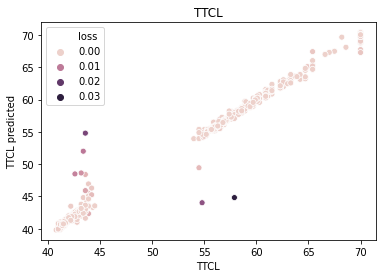

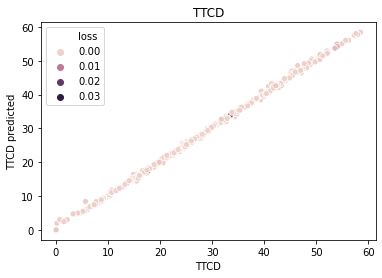

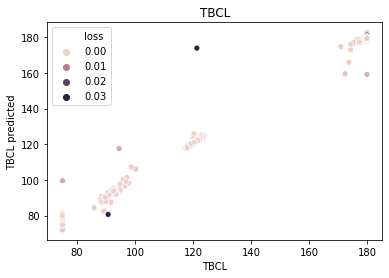

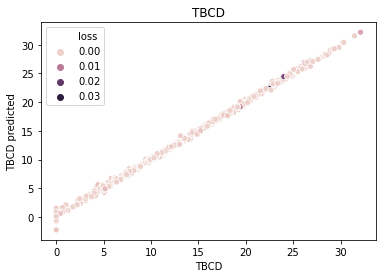

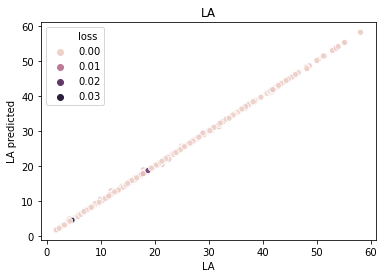

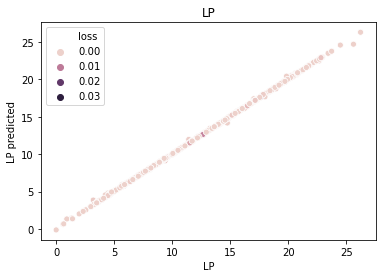

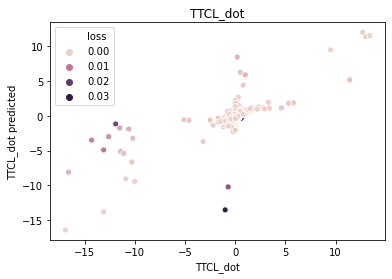

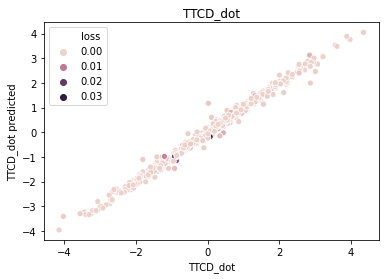

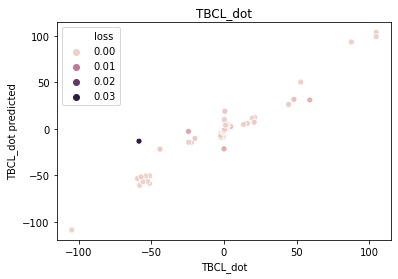

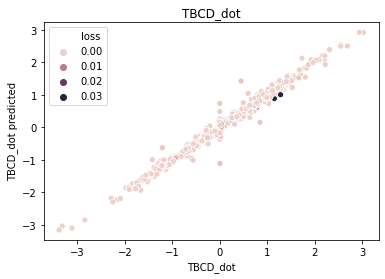

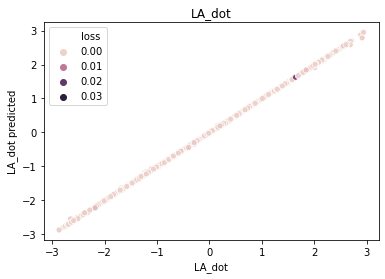

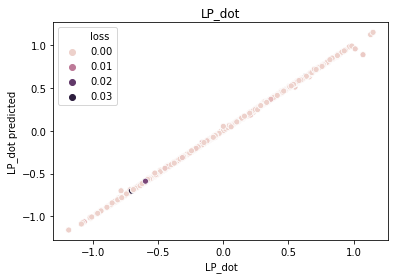

In [14]:
# a,adot,formants -> x,xdot
for param in ['TTCL','TTCD','TBCL','TBCD','LA','LP','TTCL_dot','TTCD_dot','TBCL_dot','TBCD_dot','LA_dot','LP_dot']:
    sns.scatterplot(data=maedaformants2task,x=param,y=param + ' predicted',hue='loss')
    plt.title(param)
    plt.show()

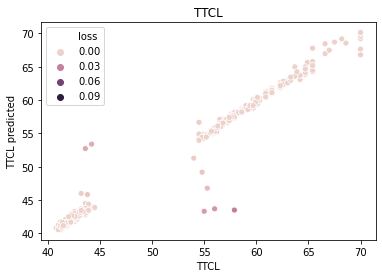

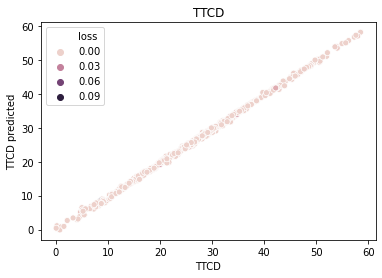

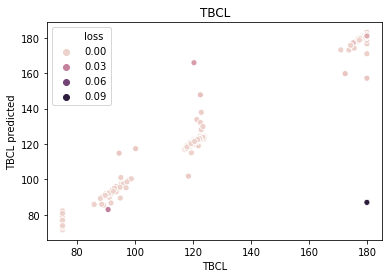

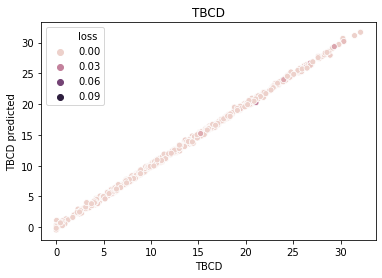

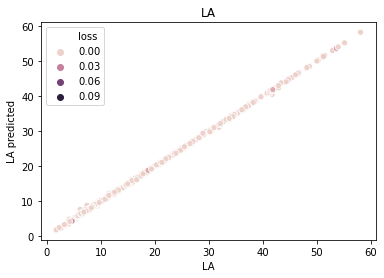

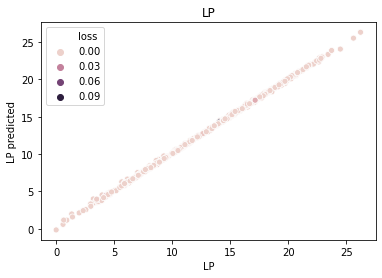

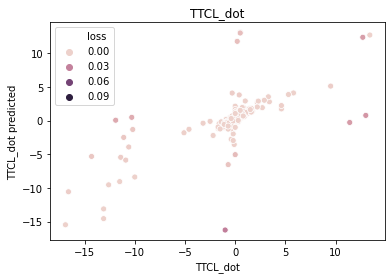

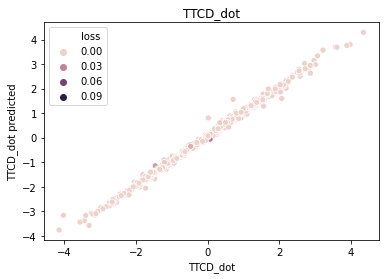

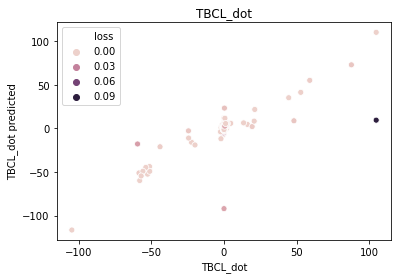

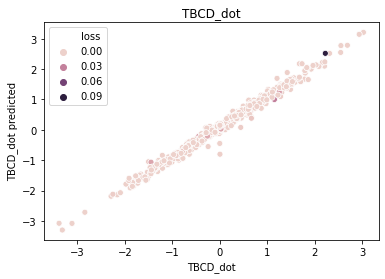

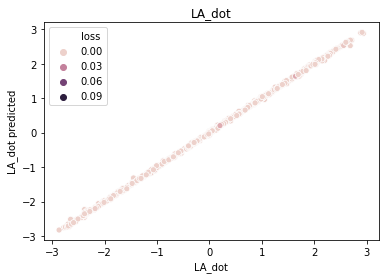

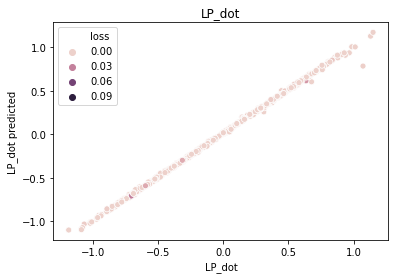

In [23]:
# a,adot -> x,xdot
for param in ['TTCL','TTCD','TBCL','TBCD','LA','LP','TTCL_dot','TTCD_dot','TBCL_dot','TBCD_dot','LA_dot','LP_dot']:
    sns.scatterplot(data=maeda2task_v_zero,x=param,y=param + ' predicted',hue='loss')
    plt.title(param)
    plt.show()

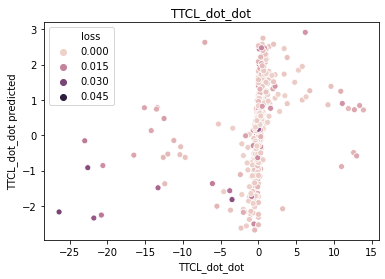

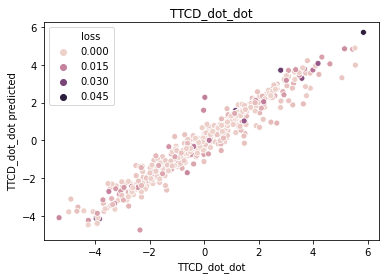

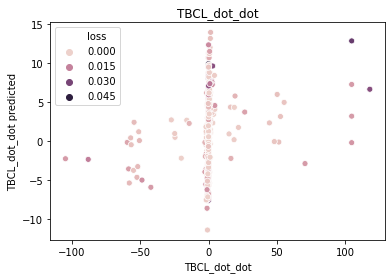

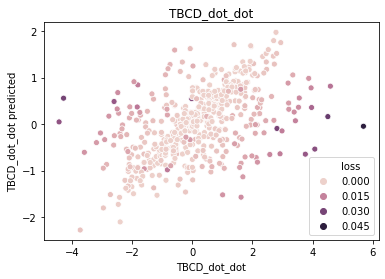

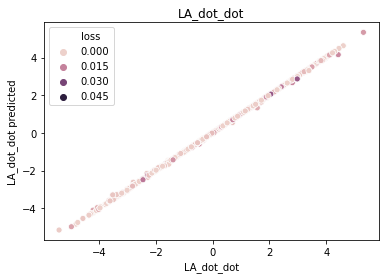

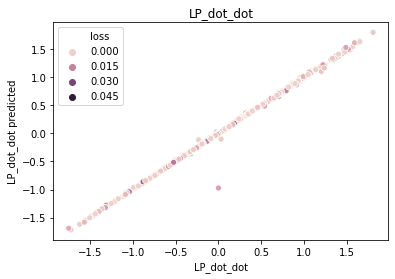

In [21]:
# adotdot -> xdotdot
for param in ['TTCL_dot_dot','TTCD_dot_dot','TBCL_dot_dot','TBCD_dot_dot','LA_dot_dot','LP_dot_dot']:
    sns.scatterplot(data=maeda2task_accel,x=param,y=param + ' predicted',hue='loss')
    plt.title(param)
    plt.show()

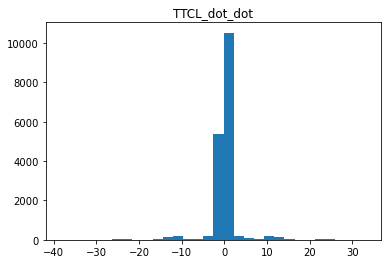

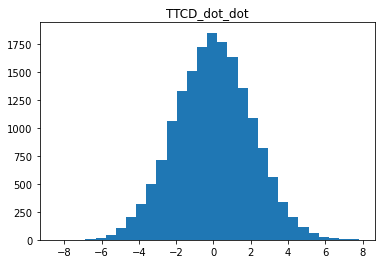

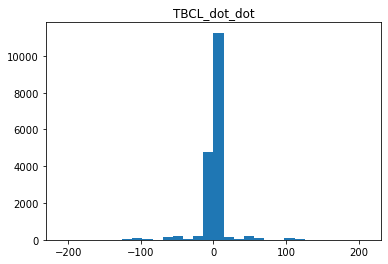

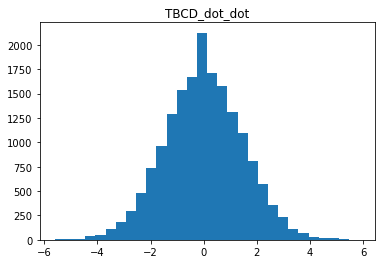

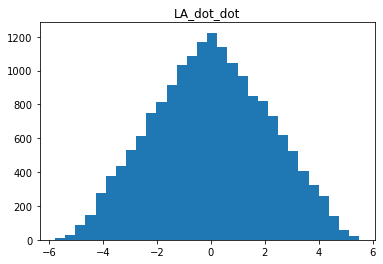

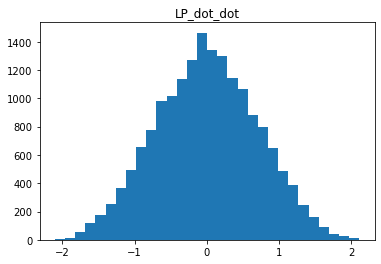

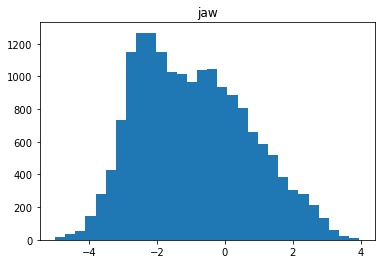

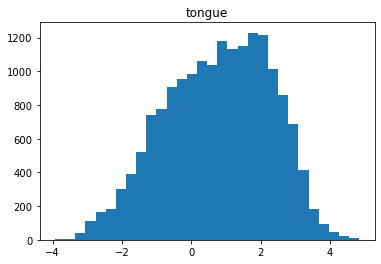

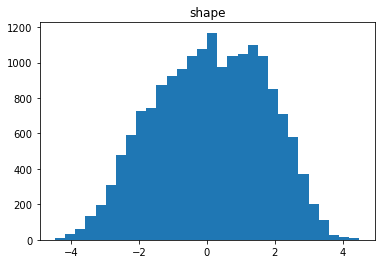

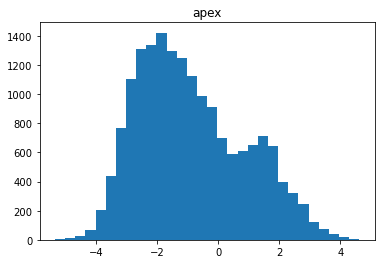

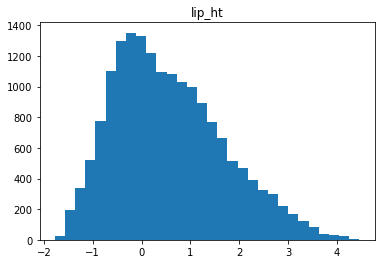

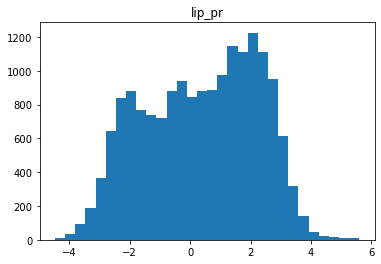

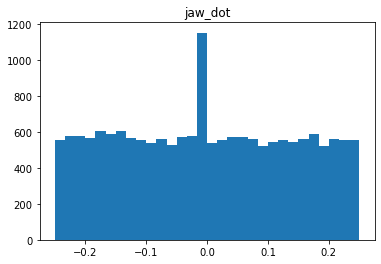

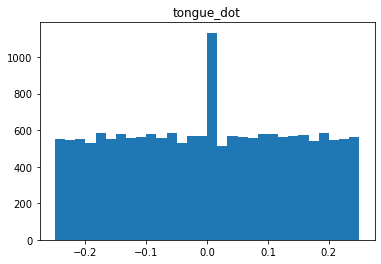

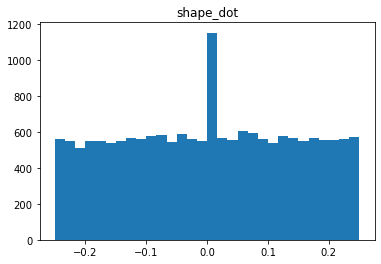

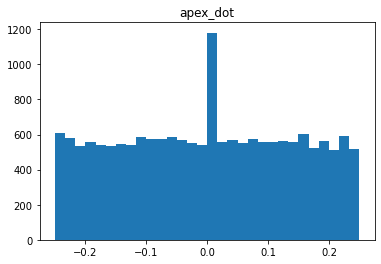

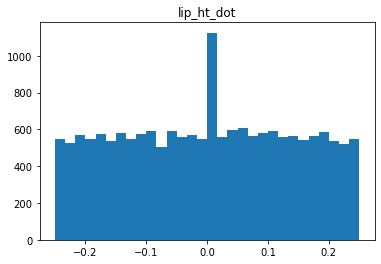

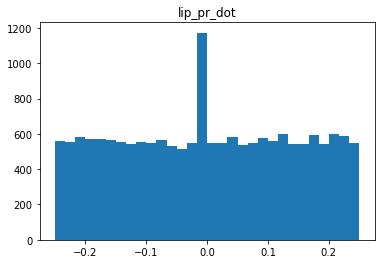

In [8]:
for col in raw_inputs.columns:
    plt.figure()
    plt.hist(raw_inputs[col],bins=30)
    plt.title(col)
    plt.show()

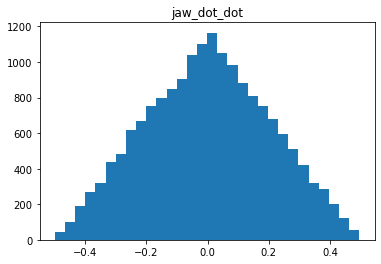

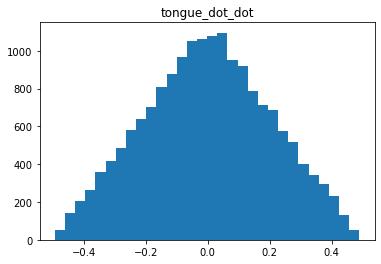

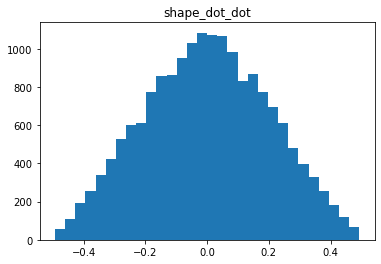

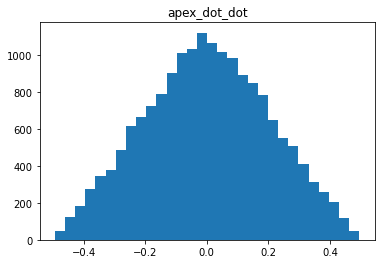

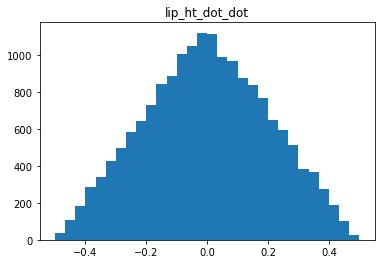

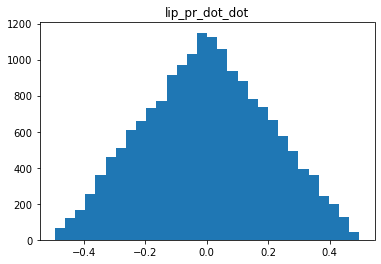

In [9]:
for col in raw_outputs.columns:
    plt.figure()
    plt.hist(raw_outputs[col],bins=30)
    plt.title(col)
    plt.show()

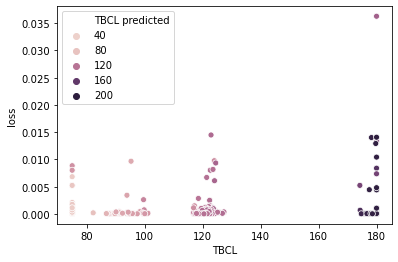

In [10]:
sns.scatterplot(data=maeda2task,x='TBCL',y='loss',hue='TBCL predicted')
plt.show()

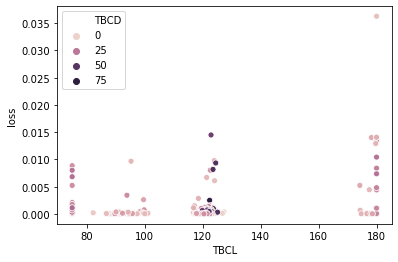

In [11]:
sns.scatterplot(data=maeda2task,x='TBCL',y='loss',hue='TBCD')
plt.show()

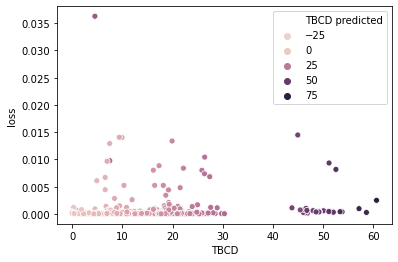

In [15]:
sns.scatterplot(data=maeda2task,x='TBCD',y='loss',hue='TBCD predicted')
plt.show()

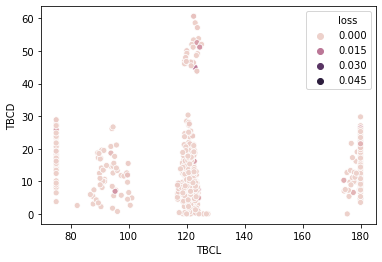

In [16]:
sns.scatterplot(data=maeda2task,x='TBCL',y='TBCD',hue='loss')
plt.show()

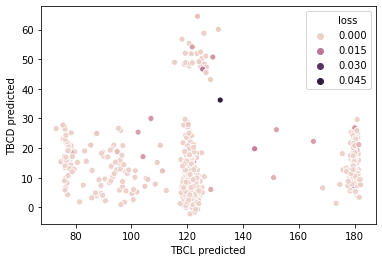

In [17]:
sns.scatterplot(data=maeda2task,x='TBCL predicted',y='TBCD predicted',hue='loss')
plt.show()

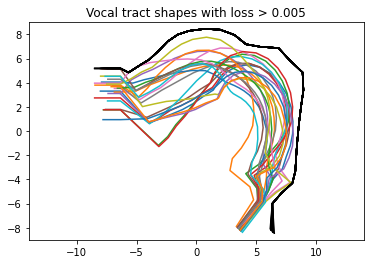

In [18]:
large_err = maeda2task[maeda2task['loss'] > 0.005]
large_err = large_err.filter(items=['jaw','tongue','shape','apex','lip_ht','lip_pr','larynx'])
TC = np.array([1,1,0,0], 'float32')
PC = np.array([0.00114,35000,1600,1.5,300000], 'float32')
anc = 0.0
for i in large_err.index:
    AM = np.zeros(7,dtype='float32')
    AM_vals = large_err.loc[i,:]
    AM[0:len(AM_vals)] = AM_vals
    formant,internal_x,internal_y,external_x,external_y= mda.maedaplant(5,29,29,29,29,TC,PC,AM,anc)
    plt.plot(internal_x-10,internal_y-10)
    plt.plot(external_x-10,external_y-10,color='black')
    plt.xlim([-14,14])
    plt.ylim([-9,9])
    plt.title('Vocal tract shapes with loss > 0.005')

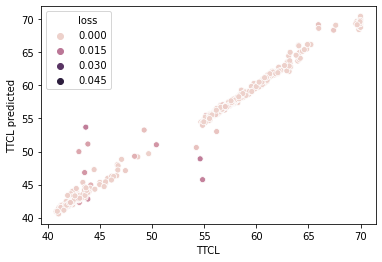

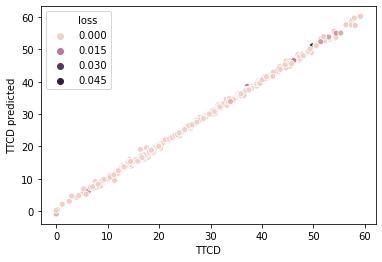

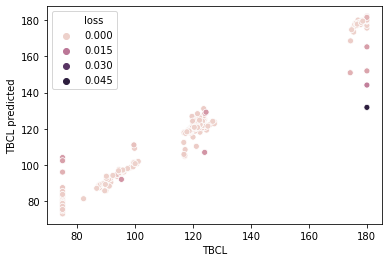

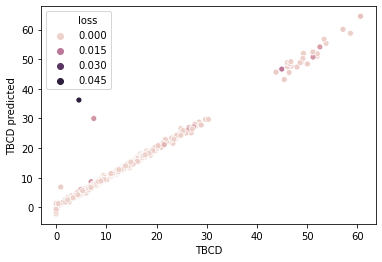

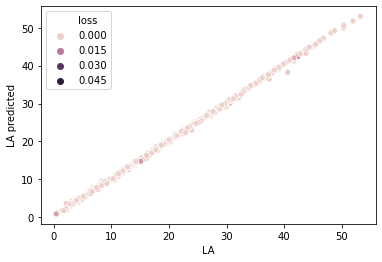

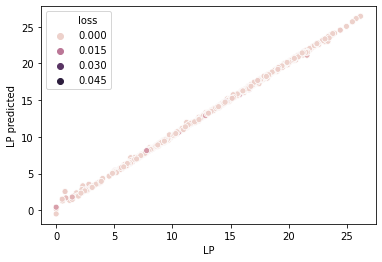

In [19]:
for param in ['TTCL','TTCD','TBCL','TBCD','LA','LP']:
    sns.scatterplot(data=maeda2task,x=param,y=param + ' predicted',hue='loss')
    plt.show()

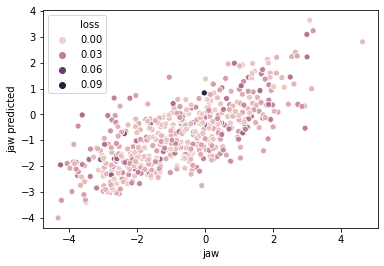

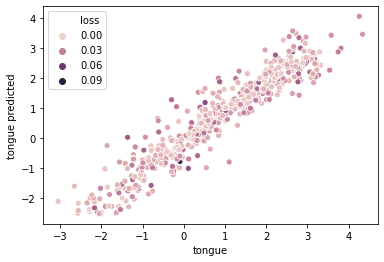

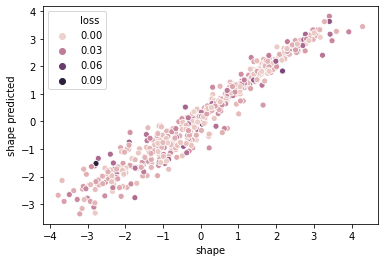

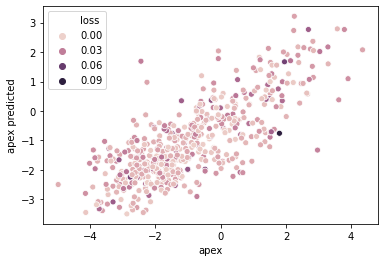

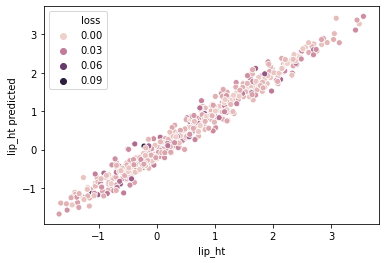

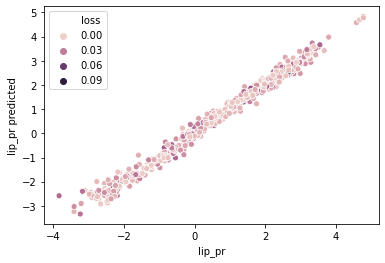

In [20]:
for param in ['jaw','tongue','shape','apex','lip_ht','lip_pr']:
    sns.scatterplot(data=task2maeda,x=param,y=param + ' predicted',hue='loss')
    plt.show()

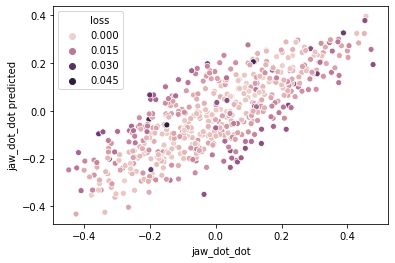

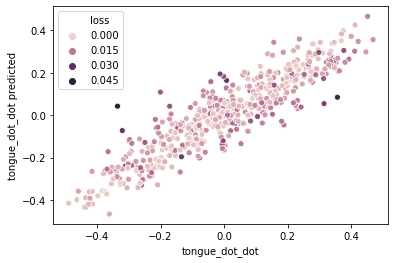

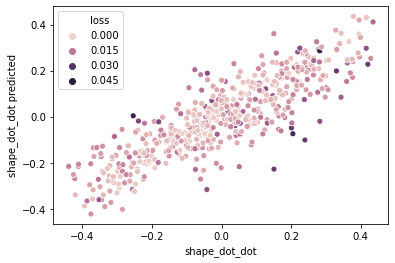

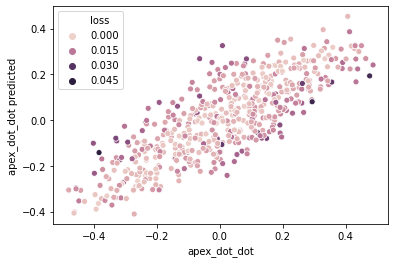

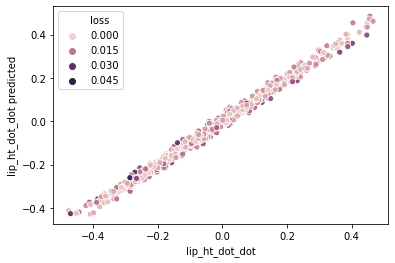

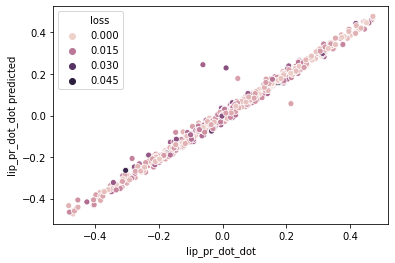

In [3]:
for param in ['jaw_dot_dot','tongue_dot_dot','shape_dot_dot','apex_dot_dot','lip_ht_dot_dot','lip_pr_dot_dot']:
    sns.scatterplot(data=task2maeda_accel,x=param,y=param + ' predicted',hue='loss')
    plt.show()

In [14]:
AMs,formants,task_params = read_in_data('training_data_files_random_walk')


(20040, 6)
(20040, 5)
(20040, 6)
